# Q2: Implementing a Denoising Autoencoder

Task: Build a denoising autoencoder to reconstruct clean MNIST images from noisy inputs

Step 1: Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

Step 2: Load the MNIST dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Step 3: Normalize and reshape the data

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

Step 4: Add Gaussian noise (mean=0, std=0.5) to the input images

In [4]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

Clip pixel values to be between 0 and 1

In [5]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Step 5: Define the denoising autoencoder model

In [6]:
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
denoising_autoencoder = Model(input_img, decoded)

Step 6: Compile the model

Note: Input is noisy, but target is clean

Step 7: Train the model

Step 8: Predict on noisy test images

In [7]:
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


history = denoising_autoencoder.fit(x_train_noisy, x_train,
                                    epochs=10,
                                    batch_size=256,
                                    shuffle=True,
                                    validation_data=(x_test_noisy, x_test),
                                    verbose=0)

decoded_imgs = denoising_autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Step 9: Plot noisy vs reconstructed images

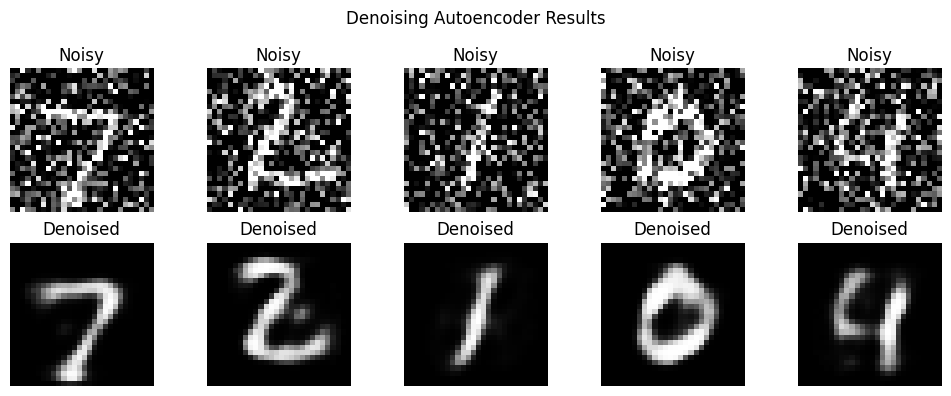

In [8]:
n = 5  # number of images to display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Noisy image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Reconstructed (denoised) image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.suptitle("Denoising Autoencoder Results")
plt.tight_layout()
plt.show()